## TSF Internship
## Name: Sarthak Wakchaure
## Task 1 : Prediction using Supervised Machine Learning 
## GRIP @ The Sparks Foundation 

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#Read dataset
dataset=pd.read_csv('student_scores.csv')

In [ ]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
dataset.shape

(25, 2)

In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
dataset.columns#columns in dataset

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
dataset.isnull().sum()#total null values

Hours     0
Scores    0
dtype: int64

In [ ]:
dataset.nunique()#total unique values

Hours     23
Scores    23
dtype: int64

## Data visualization

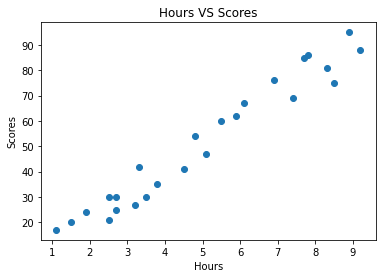

In [ ]:
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Scores')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


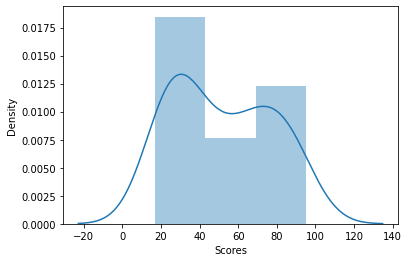

In [ ]:
#Distribution of scores
sns.distplot(dataset['Scores'])

In [ ]:
#feature and target selection
x=dataset.drop('Scores',axis=1) #feature
y=dataset['Scores']      #target

## Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
#Training and testing data
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_test.shape

(5, 1)

In [ ]:
x_train.shape

(20, 1)

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_test[:5]

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [ ]:
y_pred=lr.predict(x_test)
y_pred


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
#Actual VS Predicted
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
#Let's predict score for 9.25 hrs/day
hours = 9.25
scr = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(scr[0]))
print('\n')

No of Hours = 9.25
Predicted Score = 93.69173248737539




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## Model Evaluation

In [ ]:
from sklearn import metrics
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-2 score:', metrics.r2_score(y_test, y_pred))

Mean absolute error:  4.183859899002982
Mean squared error:  21.598769307217456
Root mean squared error:  4.647447612100373
R-2 score: 0.9454906892105354


As the R-2 score is closer to 1 which is great score for this model